# Regresión Logística

En este notebook, utilizaremos la regresión logística para entrenar un algoritmo de clasificación que permita establecer un modelo que prediga los sobrevivientes del dataset Titanic

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Carga de Datos y Análisis Exploratorio

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<Axes: xlabel='Survived', ylabel='count'>

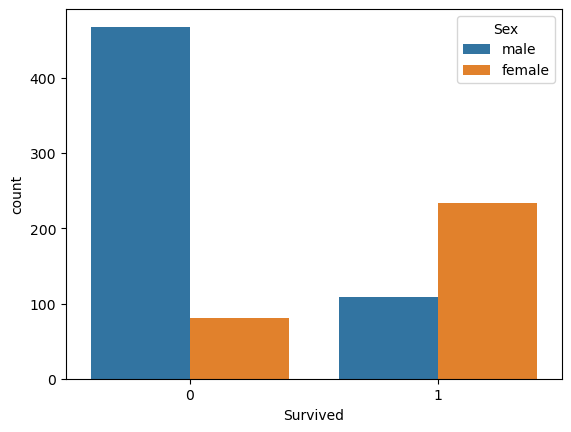

In [6]:
sns.countplot(x="Survived", hue="Sex", data=df)

<Axes: xlabel='Survived', ylabel='count'>

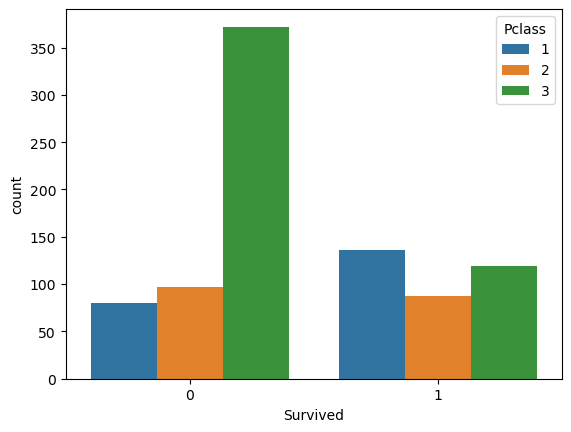

In [5]:
sns.countplot(x="Survived", hue="Pclass", data=df)

### Valores perdidos

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

La cabina no aporta mucho en el análisis, pero la edad es una variable importante para predecir si una persona sobrevivió o no a la trajedia. A continuación, una forma de "visualizar" los valores perdidos.

<Axes: >

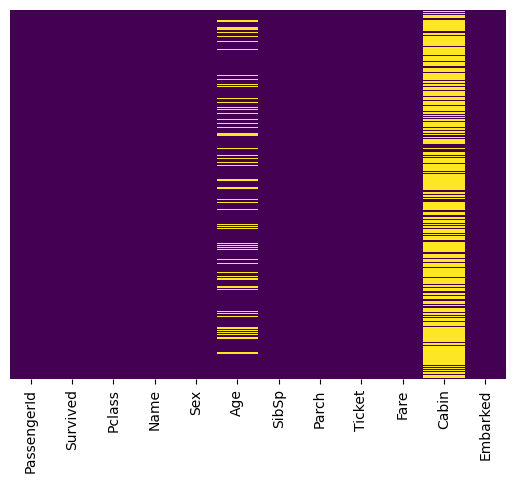

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Haremos una imputación de la edad del pasajero en función del promedio de edad de la clase en la que viajaba.

<Axes: xlabel='Pclass', ylabel='Age'>

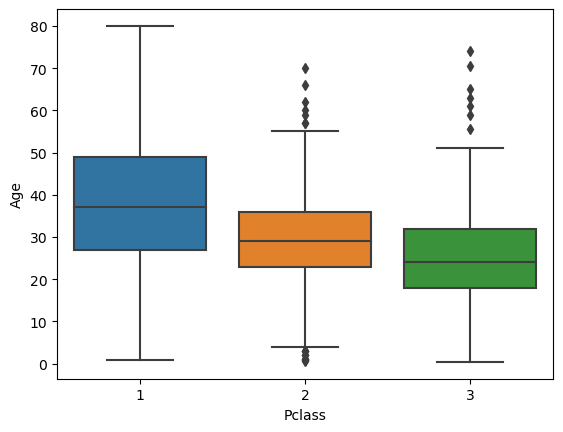

In [8]:
sns.boxplot(x='Pclass', y='Age', data=df)

In [9]:
edades = round(df.groupby('Pclass').mean()['Age'])
edades

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_2716\3638205792.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edades = round(df.groupby('Pclass').mean()['Age'])


Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [10]:
# creamos una funcion que imputa la edad en caso de estar nula
def imputar_edad(cols):
    edad = cols[0]
    pclass = cols[1]
    if(pd.isnull(edad)):
        if(pclass==1):
            return 38
        if(pclass==2):
            return 30
        if(pclass==3):
            return 25
    else:
        return edad

In [11]:
df['Age'] = df[['Age','Pclass']].apply(imputar_edad, axis=1)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Formulación del modelo

En esta sección seleccionaremos las variables que incorporaremos en la matriz de predictores "X" y en el vector de resultados "y", ya que no todas las columnas son de utilidad.

In [13]:
#Matriz de features

X=df[['Age','Sex','SibSp','Parch','Fare']]

#Valor de resultado (variable objetivo)

y=df[['Survived']]


### Tratamiento de variables categoricas

La variable Embarked es categórica, debemos transformarla en variable dummy para incorporarla en el modelo.

In [14]:
X.head(3)

,Age,Sex,SibSp,Parch,Fare
0,22.0,male,1,0,7.2500
1,38.0,female,1,0,71.2833
2,26.0,female,0,0,7.9250


In [15]:
#Se debe tratar la variable sex como numero, pero el problema es que categorica
#Por ende se hará una transformación. Se transformara en binario o mejor dicho como variable dummy.

#Con esta funcion se obtiene inmediatamente la variable en forma de 0 y 1 de la variable categorica SEX
#Como son 2 variables que son sacadas de 1, van a tener 100% de multicolinealidad, lo que sería desastroso para el modelo.
#Por ende se agrega el sufijo drop_first=True para dejar solo 1

X=pd.get_dummies(X, drop_first=True)

In [16]:
X.head(1)

,Age,SibSp,Parch,Fare,Sex_male
0,22.0,1,0,7.25,1


### Validación cruzada

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Entrenamiento de la Regresión Logística

In [24]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Realizando predicciones

In [33]:
lr.classes_

array([0, 1], dtype=int64)

In [36]:
lr.coef_

array([[-0.01901924, -0.35176673, -0.2156243 ,  0.01503996, -2.43469845]])

In [37]:
lr.intercept_

array([1.34200526])

In [48]:
p1=[[22,1,0,7.25,1]]

print('Clases de la clasificación',lr.classes_)
print('Clasificación: ',lr.predict(p1))
print('Probabilidad de la clasificación: ',lr.predict_proba(p1))

Clases de la clasificación [0 1]
Clasificación:  [0]
Probabilidad de la clasificación:  [[0.85243692 0.14756308]]


C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Evaluación del Modelo

In [49]:
y_pred=lr.predict(X_test)

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score

In [51]:
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[138  19]
 [ 33  78]]


In [ ]:
138 fueron clasificados correctamente
19 mal clasificados
33 se salvaron pero el algoritmo predijo que no se salvaron
78 se salvaron

In [52]:
(138+78)/(138+19+33+78)

0.8059701492537313

In [57]:
precision = accuracy_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.8059701492537313
